In [22]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

In [2]:
# Loading the IMDB Dataset
max_features = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

In [3]:
sample_review = X_train[0]
sample_label = y_train[0]

print('Sample Review : ', sample_review)
print('Sample Label : ', sample_label)

Sample Review :  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample Label :  1


In [4]:
# Mapping word back to words
word_index = imdb.get_word_index()
reverse_word_index = {value:key for key, value in word_index.items()}
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [6]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in sample_review])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
from tensorflow.keras.preprocessing import sequence

max_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_length)

# Trainign Simple RNN

In [24]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(SimpleRNN(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 128)          640000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 500, 128)          32896     
                                                                 
 dropout_1 (Dropout)         (None, 500, 128)          0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 685,313
Trainable params: 685,313
Non-tr

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Creating an instance of Earlystopping callback 
from tensorflow.keras.callbacks import EarlyStopping
es_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[es_callback])

Epoch 1/10
625/625 [==============================] - 547s 874ms/step - loss: 50714488.0000 - accuracy: 0.6233 - val_loss: 0.6578 - val_accuracy: 0.5574
Epoch 2/10
625/625 [==============================] - 457s 731ms/step - loss: 0.4654 - accuracy: 0.7796 - val_loss: 0.4356 - val_accuracy: 0.8210
Epoch 3/10
625/625 [==============================] - 458s 733ms/step - loss: 0.3327 - accuracy: 0.8594 - val_loss: 0.3833 - val_accuracy: 0.8368
Epoch 4/10
625/625 [==============================] - 457s 731ms/step - loss: 0.2672 - accuracy: 0.8935 - val_loss: 0.3608 - val_accuracy: 0.8428
Epoch 5/10
625/625 [==============================] - 457s 731ms/step - loss: 0.2350 - accuracy: 0.9054 - val_loss: 0.3697 - val_accuracy: 0.8428
Epoch 6/10
625/625 [==============================] - 503s 805ms/step - loss: 0.2056 - accuracy: 0.9224 - val_loss: 0.3623 - val_accuracy: 0.8554
Epoch 7/10
625/625 [==============================] - 495s 791ms/step - loss: 0.1875 - accuracy: 0.9275 - val_loss: 0

In [30]:
# Saving the model
model.save('../Output/imdb_sentiment_analysis.h5')

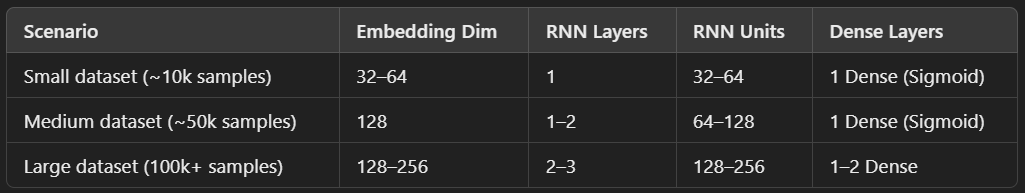
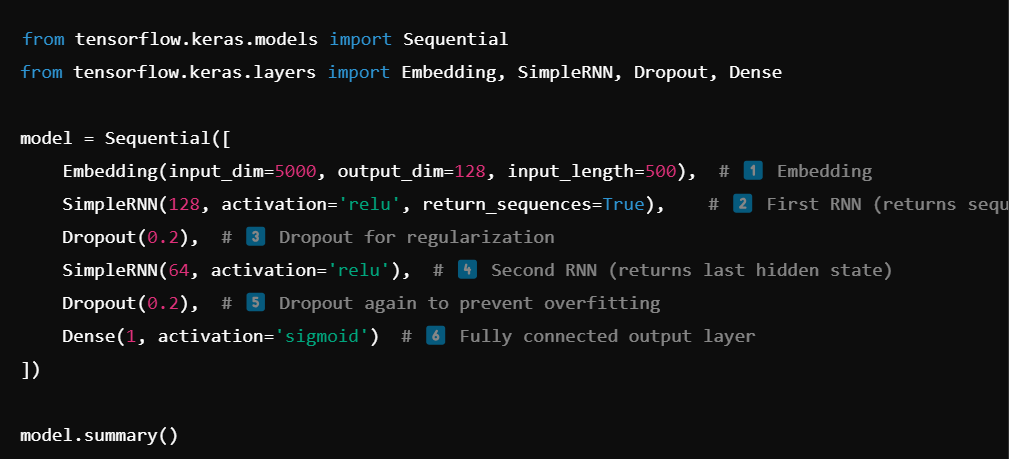